In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


# Import and clean the data

In [3]:
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates = ['date'], index_col = 'date')

In [6]:
df.head()

,value
date,
2016-06-17,21691
2016-06-18,21681
2016-06-20,28508
2016-06-21,26805
2016-06-25,21923


In [7]:
df.shape

(1176, 1)

Use quantile to remove top and bottom 2.5% data

In [8]:
df = df[(df["value"] >= df["value"].quantile(0.025)) & (df["value"] <= df["value"].quantile(0.975))]

# Draw plots
- Line plot;
- Bar plot;
- Box plot;

### Line plot

Text(0, 0.5, 'Page Views')

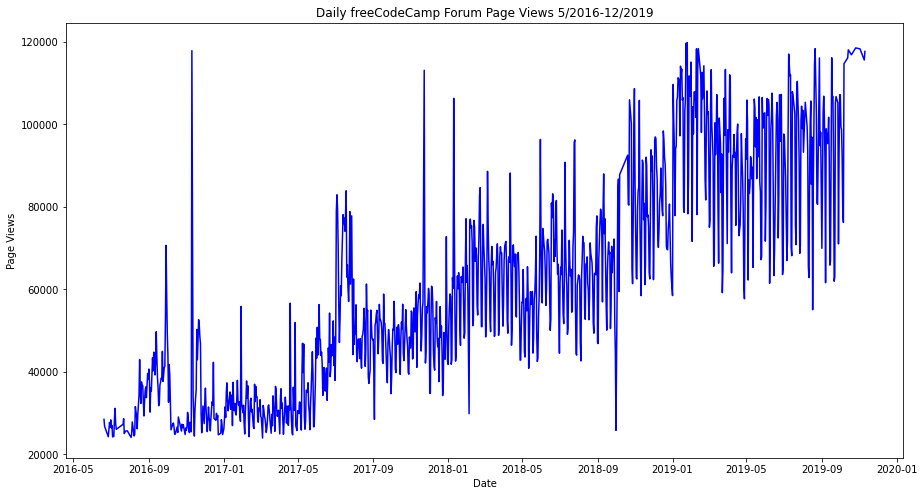

In [9]:
fig, ax = plt.subplots(figsize = (15,8))
ax.plot(df.index, df['value'], color = 'blue', linewidth=1.5)
ax.set_title ('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')

### Bar Plot

- Copy and modify data for monthly bar plot and them draw the plot

In [17]:
df_bar = df.copy()
df['month'] = df.index.month
df['year'] = df.index.year
df_bar = df.groupby (['year', 'month'])['value'].mean()
df_bar = df_bar.unstack()
df_bar.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,NaN,26804.200000,26852.142857,32473.962963,41476.866667,30166.100000,36839.678571,29576.666667
2017,32785.161290,31113.071429,29754.758621,31685.555556,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,54975.965517,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,68031.241379,63591.064516,62831.612903,65941.733333,79737.625000,78688.333333,80047.483871
2019,101425.366667,101962.608696,89763.200000,87929.413793,91439.903226,90435.642857,92588.615385,92977.227273,91364.629630,103304.181818,117235.333333,NaN


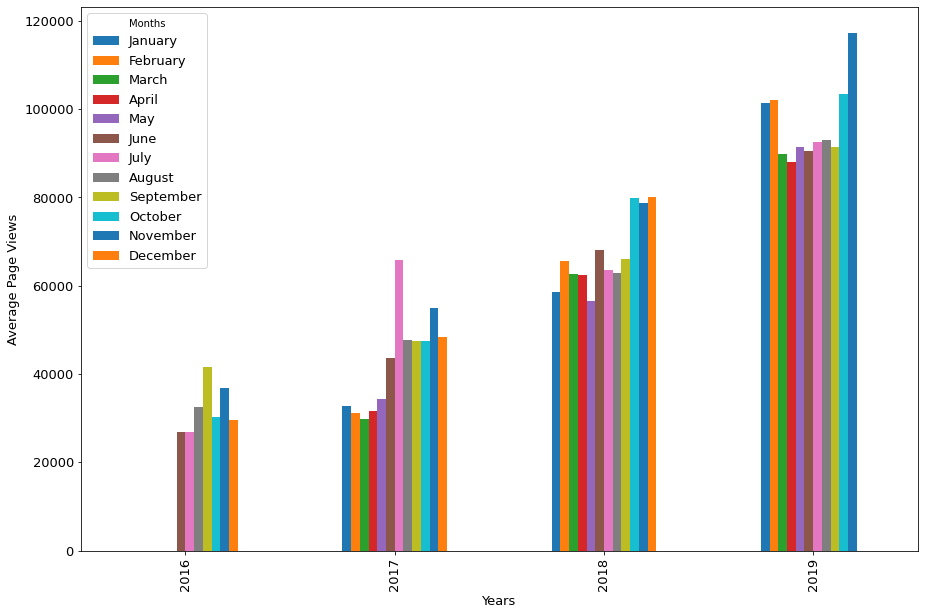

In [19]:
fig = df_bar.plot(kind ="bar", legend = True, figsize = (15,10)).figure
plt.xlabel("Years", fontsize= 13)
plt.ylabel("Average Page Views", fontsize= 13)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend(fontsize = 13, title="Months", labels = 
           ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

### Box plot

- Copy the df and modify to plot 2 charts:
 - First is Year-wise Box Plot for trend view;
 - The second is Month-wise Box Plot for seasonality.

In [20]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

Text(0, 0.5, 'Page Views')

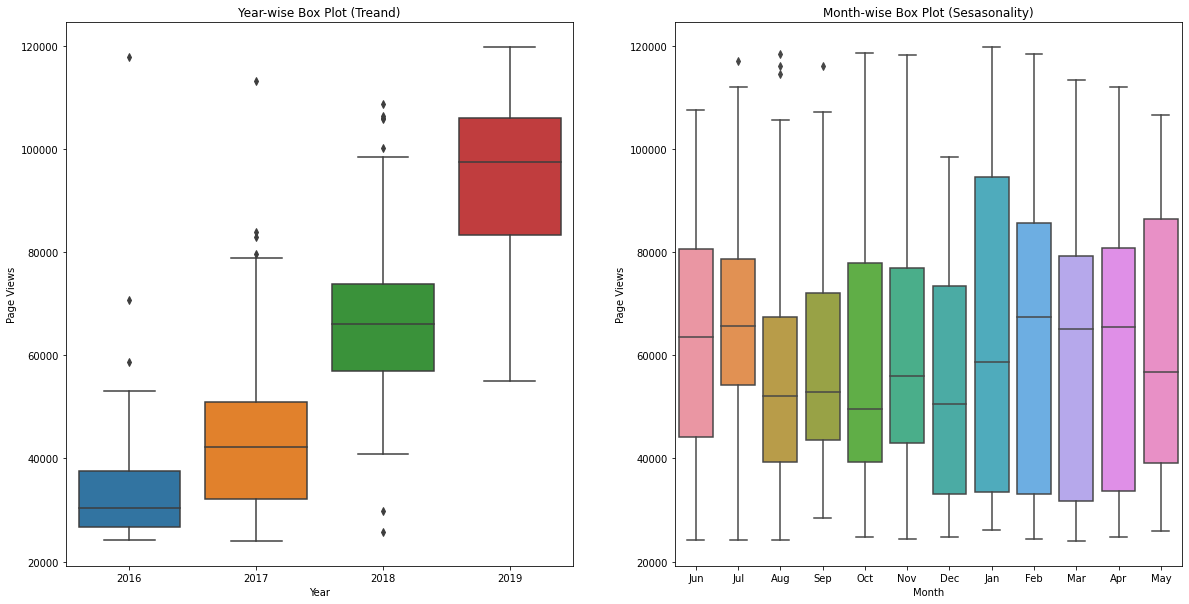

In [23]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20, 10))
ax1 = sns.boxplot(x=df_box['year'], y = df_box['value'], ax=ax1)
ax1.set_title('Year-wise Box Plot (Treand)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Page Views')

ax2 = sns.boxplot(x=df_box['month'], y=df_box['value'], ax=ax2)
ax2.set_title('Month-wise Box Plot (Sesasonality)')
ax2.set_xlabel('Month')
ax2.set_ylabel('Page Views')